In [78]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras


from tensorflow.keras import losses, optimizers
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import LeakyReLU

# import tensorflow.keras as keras
# from tensorflow.keras import 

import h5py


In [40]:


# Open the file as readonly
h5f = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]


# Close this file
h5f.close()

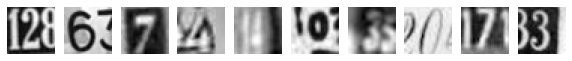

In [41]:
plt.figure(figsize = (10,1))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")
plt.show()



In [42]:
y_train1[0:10]

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3], dtype=uint8)

In [43]:
X_train = X_train.reshape(X_train.shape[0],1024) #/ 255.0
X_test = X_test.reshape(X_test.shape[0],1024) #/ 255.0

In [47]:
X_train.shape

(42000, 1024)

In [48]:
X_test.shape

(18000, 1024)

In [46]:
y_train = keras.utils.to_categorical(y_train1,10)
y_train.shape

(42000, 10)

In [49]:
y_test = keras.utils.to_categorical(y_test1,10)
y_test.shape

(18000, 10)

In [55]:
num_classes = 10 # since we have 10 class outputs in y

In [64]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(1024,)))  
                                                            

model.add(Dense(num_classes, activation='softmax'))                                                                         
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

dense_4 (None, 1024) ==> (None, 256)
dense_5 (None, 256) ==> (None, 10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 264,970
Trainable params: 264,970
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
optimizer = optimizers.Adam(lr = 0.0001)
loss = losses.categorical_crossentropy


model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

batch_size = 100
epochs = 20

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)




Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 2s 49us/sample - loss: 27.2586 - accuracy: 0.1313 - val_loss: 15.7149 - val_accuracy: 0.1695
Epoch 2/20
37800/37800 [==============================] - 1s 31us/sample - loss: 13.0164 - accuracy: 0.2214 - val_loss: 11.4446 - val_accuracy: 0.2619
Epoch 3/20
37800/37800 [==============================] - 1s 32us/sample - loss: 9.5144 - accuracy: 0.3073 - val_loss: 8.4994 - val_accuracy: 0.3381
Epoch 4/20
37800/37800 [==============================] - 1s 32us/sample - loss: 7.7284 - accuracy: 0.3687 - val_loss: 8.6165 - val_accuracy: 0.3438
Epoch 5/20
37800/37800 [==============================] - 1s 30us/sample - loss: 6.5969 - accuracy: 0.4151 - val_loss: 5.8326 - val_accuracy: 0.4448
Epoch 6/20
37800/37800 [==============================] - 1s 31us/sample - loss: 5.8895 - accuracy: 0.4498 - val_loss: 6.0907 - val_accuracy: 0.4493
Epoch 7/20
37800/37800 [=============================

In [66]:
loss,accuracy  = model.evaluate(X_test, y_test, verbose=True)

18000/18000 [==============================] - 2s 95us/sample - loss: 2.7276 - accuracy: 0.6282


model accuracy : 0.6281667


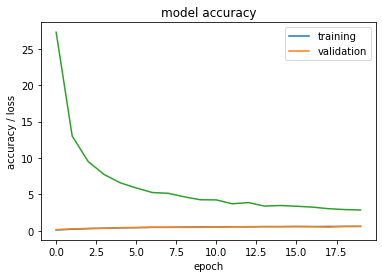

In [67]:
print("model accuracy :" , accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training','val', 'loss '], loc='best')
plt.show()

In [68]:
# increasing epoch
batch_size = 200
epochs = 30

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37200/37800 [============================>.] - ETA: 0s - loss: 2.2968 - accuracy: 0.6537800/37800 [==============================] - 1s 28us/sample - loss: 2.3018 - accuracy: 0.6584 - val_loss: 2.7226 - val_accuracy: 0.6369
Epoch 2/30
37800/37800 [==============================] - 1s 18us/sample - loss: 2.3559 - accuracy: 0.6505 - val_loss: 2.6584 - val_accuracy: 0.6379
Epoch 3/30
37800/37800 [==============================] - 1s 18us/sample - loss: 2.2647 - accuracy: 0.6564 - val_loss: 2.6579 - val_accuracy: 0.6340
Epoch 4/30
37800/37800 [==============================] - 1s 17us/sample - loss: 2.3204 - accuracy: 0.6496 - val_loss: 2.7739 - val_accuracy: 0.6274
Epoch 5/30
37800/37800 [==============================] - 1s 17us/sample - loss: 2.2669 - accuracy: 0.6531 - val_loss: 2.7066 - val_accuracy: 0.6274
Epoch 6/30
37800/37800 [==============================] - 1s 17us/sample - loss: 2.3004 - accuracy: 0.6503 - val_loss: 3

18000/18000 [==============================] - 2s 92us/sample - loss: 2.1080 - accuracy: 0.6684
model accuracy : [0.65843916, 0.6504762, 0.65637565, 0.6495767, 0.6530688, 0.650291, 0.6526984, 0.6587037, 0.65997356, 0.6701852, 0.6654233, 0.6631217, 0.6668254, 0.6681217, 0.6791799, 0.680291, 0.6795767, 0.67608464, 0.6889947, 0.68161374, 0.6783598, 0.6925926, 0.68814814, 0.68986773, 0.6857143, 0.70129627, 0.70227516, 0.69391537, 0.7016138, 0.70185184]


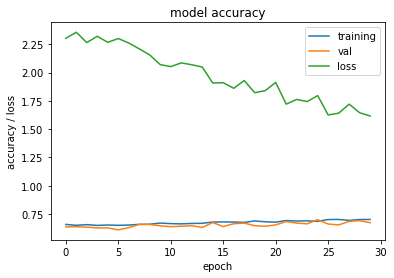

In [73]:
loss,accuracy  = model.evaluate(X_test, y_test, verbose=True)
print("model accuracy :" , history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training','val', 'loss '], loc='best')
plt.show()


dense_16 (None, 1024) ==> (None, 256)
dense_17 (None, 256) ==> (None, 64)
dense_18 (None, 64) ==> (None, 64)
dense_19 (None, 64) ==> (None, 32)
dense_20 (None, 32) ==> (None, 10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 285,418
Trainable params: 285,418
Non-trainable params: 0

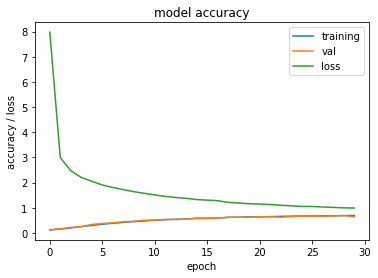

In [76]:
# increasing hidden layers
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=(1024,)))  
                                                            
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))                                                                         
        
        
print()
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

optimizer = optimizers.Adam(lr = 0.0001)
loss = losses.categorical_crossentropy


model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

batch_size = 200
epochs = 30
print()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
print()
loss,accuracy  = model.evaluate(X_test, y_test, verbose=True)
print("model accuracy :" , history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training','val', 'loss '], loc='best')
plt.show()


batch_normalization (None, 1024) ==> (None, 1024)
dense_21 (None, 1024) ==> (None, 256)
dense_22 (None, 256) ==> (None, 64)
dense_23 (None, 64) ==> (None, 64)
dense_24 (None, 64) ==> (None, 32)
dense_25 (None, 32) ==> (None, 10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense_21 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_22 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_____________________

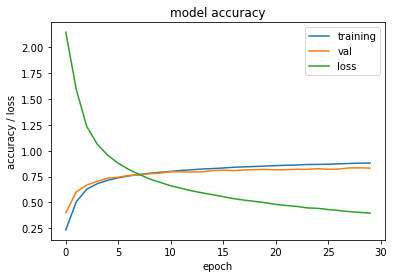

In [79]:
# adding Batch Normalizaion

# increasing hidden layers
model = Sequential()
model.add(BatchNormalization(input_shape = (1024,)))
model.add(Dense(256, activation='relu', input_shape=(1024,)))  
                                                            
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))                                                                         
        
        
print()
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

optimizer = optimizers.Adam(lr = 0.0001)
loss = losses.categorical_crossentropy


model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

batch_size = 200
epochs = 30
print()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
print()
loss,accuracy  = model.evaluate(X_test, y_test, verbose=True)
print("model accuracy :" , history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training','val', 'loss '], loc='best')
plt.show()


batch_normalization_1 (None, 1024) ==> (None, 1024)
dense_26 (None, 1024) ==> (None, 256)
dense_27 (None, 256) ==> (None, 64)
dense_28 (None, 64) ==> (None, 64)
dense_29 (None, 64) ==> (None, 32)
dense_30 (None, 32) ==> (None, 10)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_27 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 32)                2080      
___________________

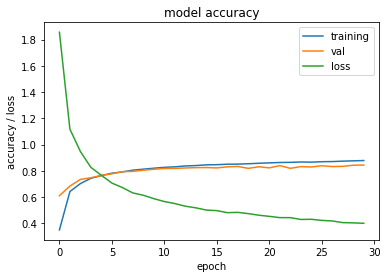

In [80]:
# increasing the learning rate

# adding Batch Normalizaion

# increasing hidden layers
model = Sequential()
model.add(BatchNormalization(input_shape = (1024,)))
model.add(Dense(256, activation='relu', input_shape=(1024,)))  
                                                            
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))                                                                         
        
        
print()
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())

optimizer = optimizers.Adam(lr = 0.005)
loss = losses.categorical_crossentropy


model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

batch_size = 200
epochs = 30
print()
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=True)
print()
loss,accuracy  = model.evaluate(X_test, y_test, verbose=True)
print("model accuracy :" , history.history['accuracy'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training','val', 'loss '], loc='best')
plt.show()

In [1]:
# have now observed better accuracy when we have increased the learning rate as well.